# Python Lab 1: Sentiment Identification


# Student Name:

# Table of Contents
1. Background
2. Goal
3. Source Data
4. Applied Methodology 
5. Assignment Guidelines
6. Conclusions and Recommendations

# 1. Background
A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis, however, they need help with under-resourced languages.

# 2. Goal
Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents.
Here are the goals:

    a. Maximize Accuracy
    b. Accurately detect negative sentiment
    


# 3. Source Data
Dataset will be imported from the following link.

• Link: http://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

# 4. Applied Methodology

There following are the approached methodology used to mined the dataset to meet the business goal.

    a.	Data Summary
    b.	Data Cleansing 
    c.	Data Wrangling
    d.	Data Validation
    e.	Data Visualization
    f.	Basic Text Mining 
    g.	Multiple Models Application
    
Note: Outline 4b to 4e will be applied to each variable.

In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


In [3]:
#Step 1: Import Data from Source Link
data_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00458/Roman%20Urdu%20DataSet.csv'
Raw_Data = pd.read_csv(data_link)
Raw_Data.head(2)

,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Unnamed: 2
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN


In [4]:
# Step 2: Add variable names becuase raw data was missing variable names.
Raw_Data = pd.read_csv(data_link , names=["Customer_Comment", "Sentiment_Classifier", "Flag"])
Raw_Data.head(2)

,Customer_Comment,Sentiment_Classifier,Flag
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN


# Apply Outline 4b to 4e to each field.

# Step 4b-4e (i): Flag Field

In [5]:
Raw_Data.groupby("Flag")["Flag"].count()

Flag
------              1
-------             1
----------          1
----------------    1
9090                1
till here           2
Name: Flag, dtype: int64

In [6]:
## Removed Flag field, looks like it is an extraneous variable as per the business objective.
Raw_Data_1 = Raw_Data[["Customer_Comment", "Sentiment_Classifier"]]
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


# Step 4b-4e (ii): Sentiment_Classifier field

In [7]:
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Neative        1
Negative    5286
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

In [8]:
Raw_Data_1['Sentiment_Classifier'] = Raw_Data_1['Sentiment_Classifier'].replace('Neative', 'Negative')
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [9]:
# Validate Data
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Negative    5287
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

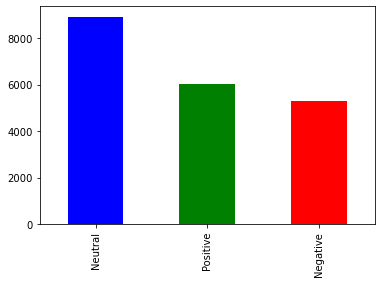

In [10]:
# Visualize Data
import matplotlib.pyplot as plt
Raw_Data_1['Sentiment_Classifier'].value_counts().plot(kind='bar' ,color=['blue', 'green', 'red'])


# Step 4b-4e (ii): Customer_Comment field

In [11]:
# Confirm if there is missing Data
print(Raw_Data_1.isnull().sum())

Customer_Comment        1
Sentiment_Classifier    0
dtype: int64


In [12]:
##This shows that there is at least one within Customer_Comment field, so let remove them.
Raw_Data_2 = Raw_Data_1[pd.notnull(Raw_Data_1["Customer_Comment"])]
Raw_Data_2.head()


,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [13]:
# Confirm if there is missing Data
print(Raw_Data_2.isnull().sum())

Customer_Comment        0
Sentiment_Classifier    0
dtype: int64


In [15]:
# Convert data to lower case, trim leading and trailing white spaces.

In [14]:
# lower case
Raw_Data_2['Customer_Comment'] = Raw_Data_2['Customer_Comment'].str.lower()
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [15]:
#trim leading and trailing white spaces
Raw_Data_2 = Raw_Data_2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [18]:
# NOTE: I am going to stop working on the Customer_Comment field here, 
#       but there are other text mining approaches that could be performed on it.
# Example is to create a token to remove stop words, or even visualize 
# the most popular words using the wordcloud package e.t.c.
# Also consider the emojis within the field could be another thing to work on.
# But I will skip all these, and just move to the step of preparing my dataset for the model.
#*************************************************************************************
####### PS: Stop words may be difficult here though since this language is not English 
#######     or any popular language that has been saved already on the stop words list.

# 4f. Basic Text Mining 

In [16]:
#Creating a corpus of the review text for initializing TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics

In [17]:
corpus=Raw_Data_2.Customer_Comment
corpus.head(2)

0    sai kha ya her kisi kay bus ki bat nhi hai lak...
1                                            sahi bt h
Name: Customer_Comment, dtype: object

In [18]:
#Initialize TFIDF vectorizer to convert the raw corpus to a matrix of TFIDF features
no_features = 22000
vectorizer = TfidfVectorizer(max_df=0.70, min_df=0.0001, max_features=no_features,ngram_range=(1,3))

In [19]:
#create TFIDF features sparse matrix by fitting it on the specified corpus
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
tfidf_matrix.shape

#**************************************************************#
#*        To complete your assignment, make use of            *#
#*               X =independent Variable                      *#
#*               Y =dependent Variable                        *#
#**************************************************************#
#Let the TFIDF features be the independent variable 
X = tfidf_matrix
#Let the Sentiment_Classifier field be the dependent variable
Y = Raw_Data_2.Sentiment_Classifier


Divide Model Data into two dataset, Train and Test Data
•	Train Data: 80% 
•	Test Data: 20%

In [20]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# 4g.    Multiple Models Application - Example

# Logistic Regression

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

#Set up Logistic Regression
######Note: You can decide to use the default setting
#####Logreg_setup= LogisticRegression()
Logreg_setup= LogisticRegression(penalty='l2', solver='newton-cg', random_state=0, multi_class='multinomial')

# fit the model with data
Logreg_model=Logreg_setup.fit(x_train, y_train)

#Test model performance
Logreg_pred=Logreg_setup.predict(x_test)

#Evaluate the Model performance,

Logreg_ascore=sklearn.metrics.accuracy_score(y_test, Logreg_pred)

print ("Accuracy Score of Logistic Regression is: %f" %(Logreg_ascore))

Accuracy Score of Logistic Regression is: 0.645329


# * Student Assignment *

# 5. Assignment Guidelines:
  
    1.	Take 70% of the data as training at random and the rest of the data set aside as test data.
    2.	Now train the following models on the 70% of the data and test on the remaining test data.
            a)	Logistic Regression (Completed by me, with 80% training dataset, change yours to 70%)
            b)	Support Vector Machine
            c)	Decision Tree 
            d)	Random Forest
    3.	Compare performance of the four models: which one has higher accuracy on the training and test sets?
    4.	Make a short conclusion(s)/recommendation(s).


# 4g.    Multiple Models Application

# Solution to Question 1: Take 70% of the data as training at random and the rest of the data set aside as test data.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Solution to Question 2: Now train the following models on the 70% of the data and test on the remaining test data.

# a) Logistic Regression


In [23]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

Logreg_setup= LogisticRegression(penalty='l2', solver='newton-cg', random_state=0, multi_class='multinomial')
Logreg_model=Logreg_setup.fit(x_train, y_train)
Logreg_pred=Logreg_setup.predict(x_test)
Logreg_ascore=sklearn.metrics.accuracy_score(y_test, Logreg_pred)

print ("Accuracy Score of Logistic Regression is: %f" %(Logreg_ascore))

Accuracy Score of Logistic Regression is: 0.646235


# b) Support Vector Machine


In [24]:
from sklearn import svm
from sklearn import metrics
linear_svm_setup = svm.LinearSVC(random_state = 0)
linear_svm_model = linear_svm_setup.fit(x_train, y_train)
linear_svm_pred = linear_svm_model.predict(x_test)
linear_svm_ascore = metrics.accuracy_score(y_test, linear_svm_pred)
print ("Accuracy Score of Logistic Regression is: %f" %(linear_svm_ascore))

Accuracy Score of Logistic Regression is: 0.631570


# c) Decision Tree 


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_setup = DecisionTreeClassifier()
dt_model = dt_setup.fit(x_train, y_train)
dt_pred = dt_setup.predict(x_test)
dt_ascore = sklearn.metrics.accuracy_score(y_test,dt_pred)

print ("Accuracy Score of the Decision Tree is: %f" %(dt_ascore))

Accuracy Score of the Decision Tree is: 0.532213


# d) Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_setup = RandomForestClassifier()
rfc_model = rfc_setup.fit(x_train,y_train)
rfc_pred = rfc_setup.predict(x_test)
rfc_ascore = sklearn.metrics.accuracy_score(y_test,rfc_pred)

print ("Accuracy Score of the Random Forect Classifier is: %f" %(rfc_ascore))

# Solution to Question 3: Compare performance of the four models: which one has higher accuracy on the training and test sets?

In [ ]:
Logistic Regression

# 6. Conclusions and Recommendations

In [ ]:
While the logistic regression has a higher accuracy, it isn't by much. Especially when considering that the vector model is 0.04665 off of that model.